In [1]:
from DataFetcher import DataFetcher
from USTs import USTs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import pandas_datareader.data as web

In [2]:
auctions = DataFetcher().fetch_auction_data()
prices = DataFetcher().fetch_historical_UST_data(date=datetime.datetime(year=2025, month=6, day=26))

In [3]:
ust_set = USTs(auction_data=auctions, price_data=prices)
ust_set = ust_set.get_current_UST_set(settlement_date=datetime.date(2025, 6, 27),
                                      get_ytms=True, include_FRNs=False, include_TIPS=False)

Merged auction and price data successfully
No missing or excess data
All CUSIPs are identical between DataFrames


In [4]:
filtered_set = ust_set[ust_set['Days to expiry'] > 60].reset_index(drop=True)
filtered_set

,Cusip,Security type,Rate,Maturity date,End of day,Original security term,Issue date,Currently outstanding,Days to expiry,EOD YTM
0,912797QL4,Bill,0.000,2025-08-26,99.28000,17-Week,2025-07-01,6.019500e+10,61,4.411765
1,912797PQ4,Bill,0.000,2025-08-28,99.25600,26-Week,2025-05-29,7.125200e+10,63,4.412831
2,91282CHV6,Note,5.000,2025-08-31,100.06250,2-Year,2023-08-31,NaN,66,4.513388
3,9128284Z0,Note,2.750,2025-08-31,99.68750,7-Year,2018-08-31,NaN,66,4.437690
4,91282CAJ0,Note,0.250,2025-08-31,99.25000,5-Year,2020-08-31,NaN,66,4.470640
...,...,...,...,...,...,...,...,...,...,...
365,912810UA4,Bond,4.625,2054-05-15,96.68750,30-Year,2024-07-15,5.085000e+10,10550,4.840632
366,912810UC0,Bond,4.250,2054-08-15,90.90625,30-Year,2024-10-15,5.196500e+10,10642,4.832989
367,912810UE6,Bond,4.500,2054-11-15,94.87500,30-Year,2025-01-15,5.322900e+10,10734,4.829236
368,912810UG1,Bond,4.625,2055-02-15,96.90625,30-Year,2025-04-15,5.423000e+10,10826,4.820403


In [5]:
filtered_set.sort_values(by='Days to expiry', ascending=True).head(30)

,Cusip,Security type,Rate,Maturity date,End of day,Original security term,Issue date,Currently outstanding,Days to expiry,EOD YTM
0,912797QL4,Bill,0.00,2025-08-26,99.280000,17-Week,2025-07-01,6.019500e+10,61,4.411765
1,912797PQ4,Bill,0.00,2025-08-28,99.256000,26-Week,2025-05-29,7.125200e+10,63,4.412831
2,91282CHV6,Note,5.00,2025-08-31,100.062500,2-Year,2023-08-31,NaN,66,4.513388
3,9128284Z0,Note,2.75,2025-08-31,99.687500,7-Year,2018-08-31,NaN,66,4.437690
4,91282CAJ0,Note,0.25,2025-08-31,99.250000,5-Year,2020-08-31,NaN,66,4.470640
5,912797QM2,Bill,0.00,2025-09-02,99.205306,17-Week,2025-05-06,NaN,68,4.363983
6,912797MH7,Bill,0.00,2025-09-04,99.179667,52-Week,2025-06-05,1.150490e+11,70,4.375335
7,912797QT7,Bill,0.00,2025-09-09,99.130500,17-Week,2025-05-13,NaN,75,4.326368
8,912797PW1,Bill,0.00,2025-09-11,99.104889,26-Week,2025-06-12,6.868300e+10,77,4.337716
9,91282CFK2,Note,3.50,2025-09-15,99.812500,3-Year,2022-09-15,NaN,81,4.306463


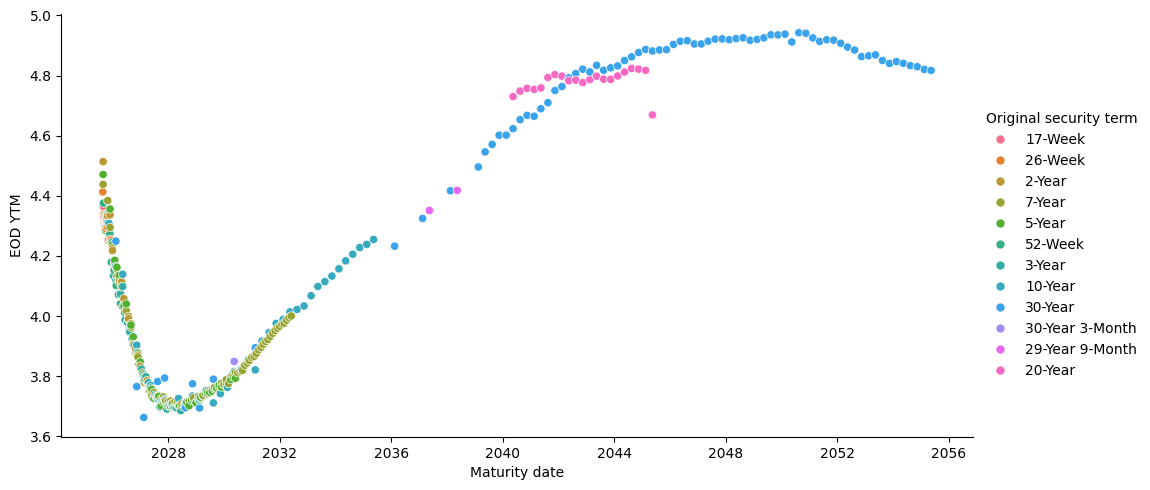

In [6]:
sns.relplot(data=filtered_set, x='Maturity date', y='EOD YTM', hue='Original security term', kind='scatter', aspect=2)